In [1]:
import sys
import datetime

import numpy as np
from scipy import integrate
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from struct import pack, unpack

sys.path.insert(0, "../")
from paths import FIG_DIR, DATA_DIR

In [7]:
num_rep = 100000 #*10 in the inner loop
rng = np.random.default_rng(4653)
list_m = [5, 10, 15, 20, 30, 50, 70, 100, 150, 200, 300, 400, 600, 800, 1000]
list_supp = [2, 3, 4, 5, 6, 7, 10, 20, 30, 50, 70, 100, 150, 200, 300, 500]
df_results = pd.DataFrame(index=list_supp, columns=list_m)

for m in list_m:
    ssb_utility = np.triu(np.ones((m, m))) - np.tril(np.ones((m, m)))
    for supp in list_supp:
        if supp > m:
            break
        alpha = np.ones(supp)
        df_results.loc[supp, m] = 0
        for _ in range(10):
            lott_comps = rng.dirichlet(alpha, (3, num_rep))
            mask = np.tile(np.array([1]*supp + [0]*(m - supp)), (3, num_rep, 1))
            mask = rng.permuted(mask, axis=2)
            lotteries = np.zeros((3, num_rep, m))
            lotteries[mask.astype(bool)] = lott_comps.flatten()
            comp01 = (np.sum(lotteries[0,:,:] @ ssb_utility * lotteries[1,:,:], axis=1) > 0).astype(int)
            comp12 = (np.sum(lotteries[1,:,:] @ ssb_utility * lotteries[2,:,:], axis=1) > 0).astype(int)
            comp20 = (np.sum(lotteries[2,:,:] @ ssb_utility * lotteries[0,:,:], axis=1) > 0).astype(int)
            num_intr = np.sum(comp01 + comp12 + comp20 == 0) + np.sum(comp01 + comp12 + comp20 == 3)
            df_results.loc[supp, m] += num_intr
    print(f"{m} completed")

5 completed
10 completed
15 completed
20 completed
30 completed
50 completed
70 completed
100 completed
150 completed
200 completed
300 completed
400 completed
600 completed
800 completed
1000 completed


In [4]:
# df_results.to_csv(DATA_DIR / "6_2_restriced_support.csv")
df_results = pd.read_csv(DATA_DIR / "6_2_restriced_support.csv", index_col=0)
df_results.columns = [int(col) for col in df_results.columns]
df_results

,5,10,15,20,30,50,70,100,150,200,300,400,600,800,1000
2,3560.0,7468.0,8799.0,9693.0,10255.0,10840.0,11286.0,11424.0,11407.0,11590.0,11551.0,11682.0,11597,11717,11571
3,4255.0,10088.0,12539.0,13507.0,14639.0,15913.0,16047.0,16674.0,16742.0,16796.0,16851.0,17240.0,17092,17089,17066
4,3524.0,9485.0,12006.0,13619.0,15170.0,16336.0,16512.0,17344.0,17481.0,17642.0,17935.0,17919.0,17915,17915,17974
5,2347.0,8574.0,10980.0,12461.0,14117.0,15298.0,15836.0,16268.0,16939.0,16968.0,16777.0,16899.0,17292,17263,17101
6,NaN,7213.0,9993.0,11472.0,12799.0,14104.0,14518.0,15170.0,15512.0,15697.0,15593.0,15795.0,15917,16119,15922
7,NaN,6152.0,8752.0,10244.0,11645.0,13098.0,13436.0,14028.0,14158.0,14250.0,14674.0,14808.0,14842,14842,15096
10,NaN,3564.0,5933.0,7335.0,8918.0,10055.0,10861.0,10893.0,11489.0,11588.0,11818.0,11794.0,11854,11876,11936
20,NaN,NaN,NaN,2752.0,4166.0,5294.0,5767.0,6199.0,6500.0,6594.0,6796.0,6915.0,7098,6812,6998
30,NaN,NaN,NaN,NaN,2198.0,3202.0,3569.0,4161.0,4319.0,4498.0,4625.0,4822.0,4784,4826,4833
50,NaN,NaN,NaN,NaN,NaN,1424.0,1821.0,2207.0,2543.0,2651.0,2834.0,2900.0,2946,2927,3094


In [5]:
# Ensure all data in df_results is numeric
df_results_numeric = df_results.apply(pd.to_numeric, errors='coerce')
df_results_numeric = df_results_numeric / 10**6
df_results_numeric = df_results_numeric[[5, 10, 15, 20, 30, 50, 100, 200, 400, 600, 1000]]
df_results_numeric

,5,10,15,20,30,50,100,200,400,600,1000
2,0.003560,0.007468,0.008799,0.009693,0.010255,0.010840,0.011424,0.011590,0.011682,0.011597,0.011571
3,0.004255,0.010088,0.012539,0.013507,0.014639,0.015913,0.016674,0.016796,0.017240,0.017092,0.017066
4,0.003524,0.009485,0.012006,0.013619,0.015170,0.016336,0.017344,0.017642,0.017919,0.017915,0.017974
5,0.002347,0.008574,0.010980,0.012461,0.014117,0.015298,0.016268,0.016968,0.016899,0.017292,0.017101
6,NaN,0.007213,0.009993,0.011472,0.012799,0.014104,0.015170,0.015697,0.015795,0.015917,0.015922
7,NaN,0.006152,0.008752,0.010244,0.011645,0.013098,0.014028,0.014250,0.014808,0.014842,0.015096
10,NaN,0.003564,0.005933,0.007335,0.008918,0.010055,0.010893,0.011588,0.011794,0.011854,0.011936
20,NaN,NaN,NaN,0.002752,0.004166,0.005294,0.006199,0.006594,0.006915,0.007098,0.006998
30,NaN,NaN,NaN,NaN,0.002198,0.003202,0.004161,0.004498,0.004822,0.004784,0.004833
50,NaN,NaN,NaN,NaN,NaN,0.001424,0.002207,0.002651,0.002900,0.002946,0.003094


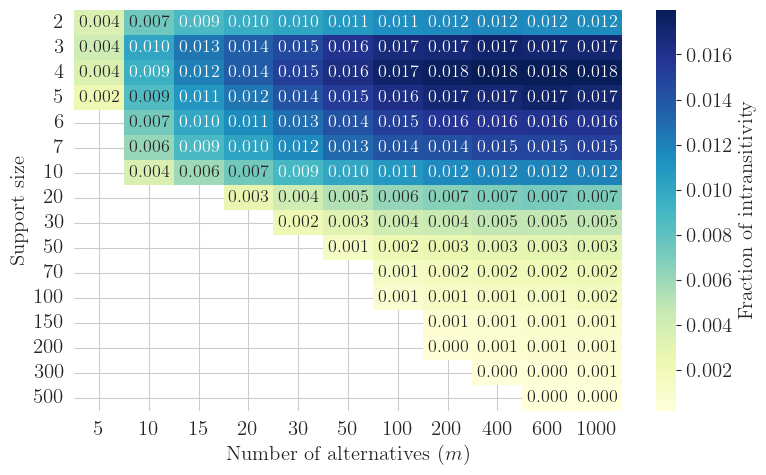

In [6]:
sns.set_style("whitegrid")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'cm'
mpl.rcParams['font.size'] = 15

# Plot with error bars
plt.figure(figsize=(8, 5))
sns.heatmap(df_results_numeric, annot=True, fmt=".03f", mask=df_results_numeric.isnull(), cmap="YlGnBu", 
            cbar=True, cbar_kws={'label': 'Fraction of intransitivity'}, annot_kws={'size': 13})

# Modify axis labels
plt.xlabel(r'Number of alternatives ($m$)')
plt.ylabel("Support size")

plt.tight_layout()
plt.savefig(FIG_DIR / "6_2_restr_supp.png", dpi=300)
plt.savefig(FIG_DIR / "6_2_restr_supp.pdf")